# Exploratory Data Analysis

In [1]:
# Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Loading the database

df = pd.read_csv('florianópolis_rental_prices.csv')

In [3]:
# Viewing the first rows of the database

df.head(5)

,text,region,district,square_meters,condominium_fee,bedrooms,bathrooms,garages,price
0,Apartamento com 1 dormitório no Centro,downtown,Centro,40,690.0,1,1,1,1800
1,Alugo apto mobiliado ao lado da Ufsc,downtown,Carvoeira,81,720.0,2,1,1,2500
2,"APARTAMENTO, Residencial; 2 dormitorios, 1 bwc",downtown,Carvoeira,81,460.0,2,1,1,2100
3,Florianopolis - Apartamento Padrão - Centro,downtown,Centro,46,560.0,1,1,1,2000
4,Apto 1 Dorm. Próximo Ufsc Carvoeira,downtown,Carvoeira,30,75.0,1,1,0,1300


In [4]:
# Viewing the size of the database

print(f'The database has {df.shape[0]} rows and {df.shape[1]} columns')

The database has 1000 rows and 9 columns


In [5]:
# Describing the database

df.describe().round(2)

,square_meters,condominium_fee,bedrooms,bathrooms,garages,price
count,1000.00,740.00,1000.00,1000.00,1000.00,1000.00
mean,87.20,787.59,2.10,1.82,1.22,3955.16
std,59.36,554.65,0.84,0.96,0.75,3350.67
min,1.00,1.00,1.00,1.00,0.00,150.00
25%,50.00,470.00,1.00,1.00,1.00,1965.00
50%,74.50,677.50,2.00,2.00,1.00,3100.00
75%,102.00,959.00,3.00,2.00,2.00,4800.00
max,505.00,4600.00,5.00,5.00,5.00,33000.00


In [6]:
# Counting values by region

df['region'].value_counts()

downtown     200
continent    200
east         200
north        200
south        200
Name: region, dtype: int64

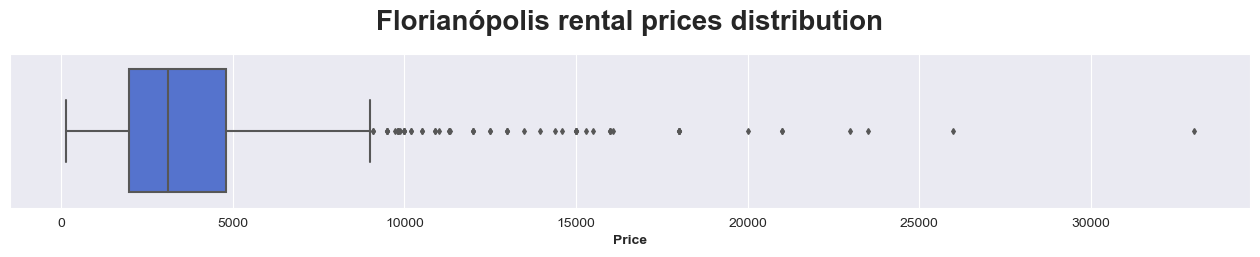

In [7]:
# Viewing prices distribution in a boxplot

sns.set_style('darkgrid')

plt.figure(figsize=(16,2))

ax = sns.boxplot(x = df['price'], 
                 fliersize = 3, 
                 orient = 'horizontal',
                 color = 'royalblue')

ax.set_title('Florianópolis rental prices distribution', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Price', 
              fontweight = 'bold')

ax = ax


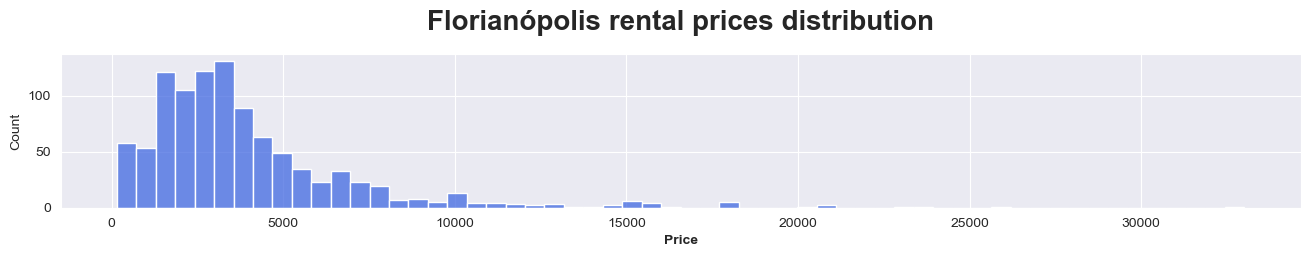

In [8]:
# Viewing prices distribution in a histogram

sns.set_style('darkgrid')

plt.figure(figsize=(16,2))

ax = sns.histplot(x = df['price'],
                 color = 'royalblue')

ax.set_title('Florianópolis rental prices distribution', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Price', 
              fontweight = 'bold')

ax = ax

Most of the data is located up to R$ 5000. 

This limit will be set in the creation of the regression models.

In [9]:
# Calculating some statistics of the rental prices distribution

median = np.nanmean(df['price'])
upper_quartile = np.nanpercentile(df['price'], 75)
lower_quartile = np.nanpercentile(df['price'], 25)

iqr = upper_quartile - lower_quartile
upper_limit = df['price'][df['price']<=upper_quartile+1.5*iqr].max()
lower_limit = df['price'][df['price']>=lower_quartile-1.5*iqr].min()

print(f'The median of the rental price is {median.round(2)}.')
print(f'The upper limit of the rental price is {upper_limit}.')
print(f'The lower limit of the rental price is {lower_limit}.')

The median of the rental price is 3955.16.
The upper limit of the rental price is 9000.
The lower limit of the rental price is 150.


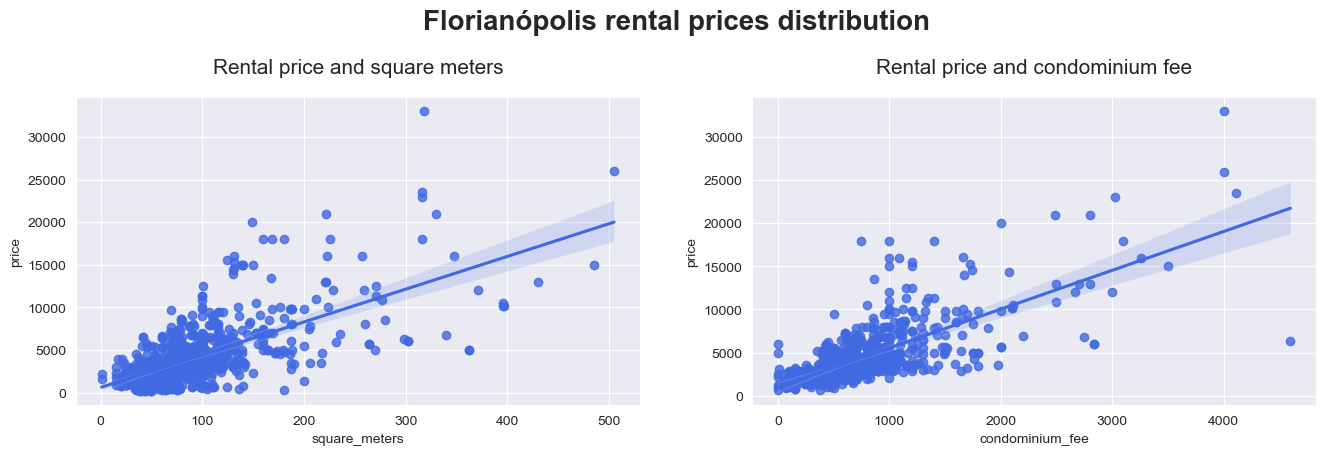

In [18]:
# Viewing prices distribution by square meters and condominium fee

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

fig.suptitle('Florianópolis rental prices distribution',
             fontweight = 'bold', 
             fontsize = 20,
             y = 1.1)

ax1 = sns.regplot(ax = ax[0], 
                data = df, 
                x = 'square_meters', 
                y = 'price', 
                color = 'royalblue')

ax[0].set_title('Rental price and square meters',
             fontsize = 15,
             y = 1.05)

ax2 = sns.regplot(ax = ax[1], 
                data = df, 
                x = 'condominium_fee', 
                y = 'price', 
                color = 'royalblue')

ax[1].set_title('Rental price and condominium fee',
             fontsize = 15,
             y = 1.05)

ax = ax

Plotting features vs. rental price provides some indication of which features have the strongest influence on price. 

Above, increasing size and increasing condominium fee also increases price.

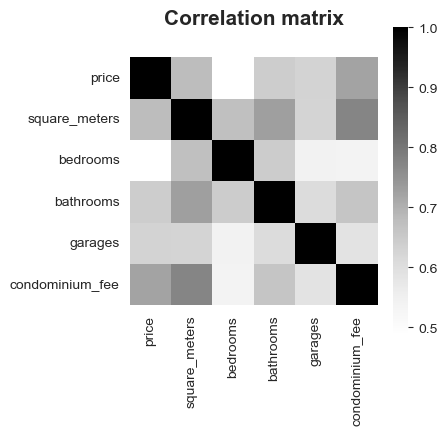

In [19]:
plt.figure(figsize=(4,4))

ax = sns.heatmap(df[['price','square_meters','bedrooms','bathrooms', 'garages', 'condominium_fee']].corr(), 
                 cmap='Greys',
                 square = True)

ax.set_title('Correlation matrix', 
             fontweight = 'bold', 
             fontsize = 15, 
             y = 1.1)

ax = ax

Since the variable 'bedrooms' does not show a significant correlation with rental prices, it'll not be included it in the regression model.

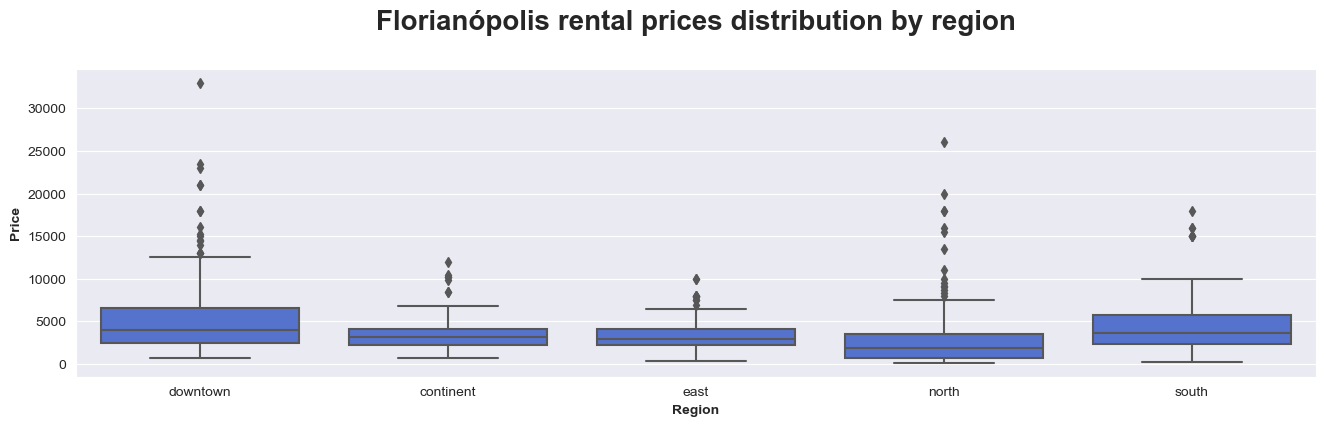

In [12]:
# Viewing prices distribution by region

plt.figure(figsize=(16,4))

ax = sns.boxplot(x = 'region', 
                 y = 'price', 
                 data = df,
                 color = 'royalblue')

ax.set_title('Florianópolis rental prices distribution by region', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_ylabel('Price', 
              fontweight = 'bold')

ax.set_xlabel('Region', 
              fontweight = 'bold')

ax = ax

All regions have outliers. These values will be taken from the dataset for the regression model.

Below it's possible to see the same graph without outliers.

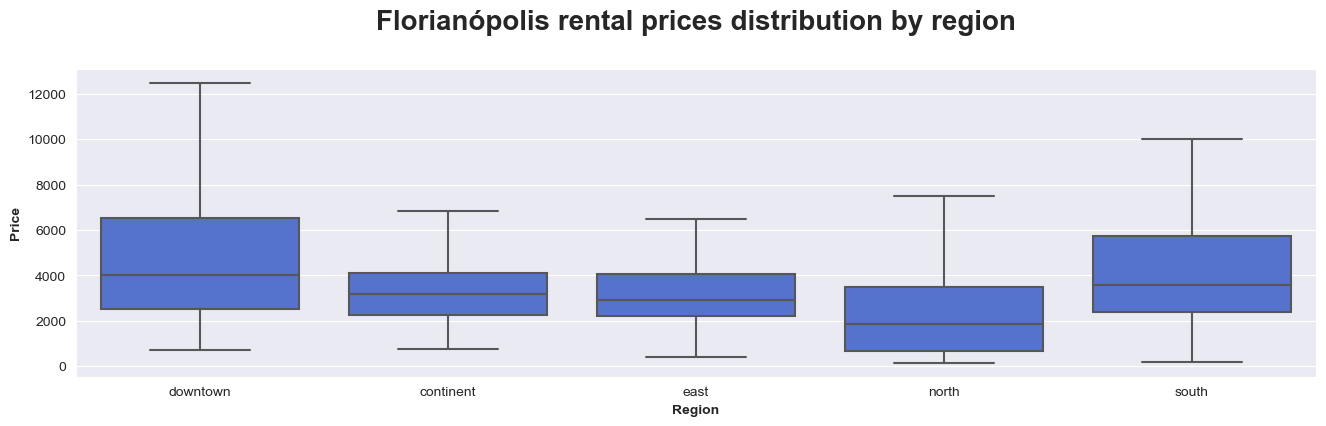

In [13]:
# Viewing prices distribution by region

plt.figure(figsize=(16,4))

ax = sns.boxplot(x = 'region', 
                 y = 'price', 
                 data = df,
                 color = 'royalblue',
                 showfliers = False)

ax.set_title('Florianópolis rental prices distribution by region', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_ylabel('Price', 
              fontweight = 'bold')

ax.set_xlabel('Region', 
              fontweight = 'bold')

ax = ax

Median apartment rental prices are lower in the north of the island and higher in the south and downtown. 

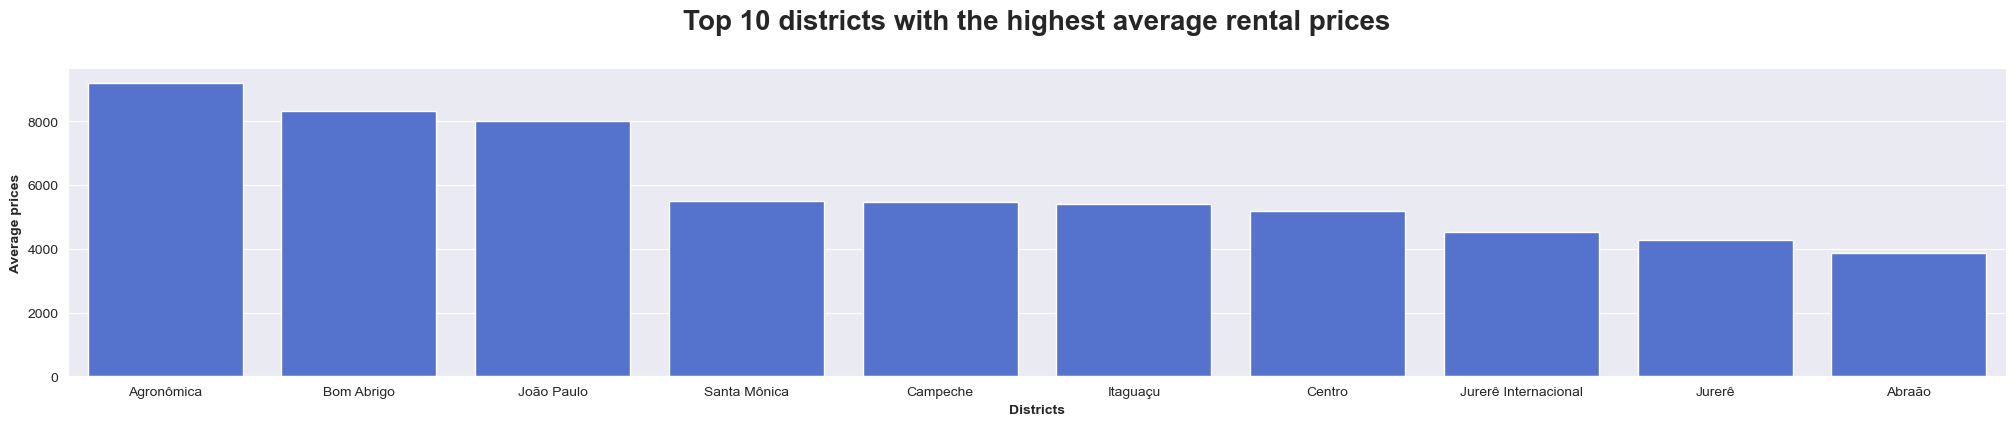

In [14]:
# Viewing the top 10 districts with the highest average rental prices

districtsavg = df.groupby(['district']).mean().round(2).reset_index()

plt.figure(figsize=(25,4))

ax = sns.barplot(x = 'district', 
                 y = 'price', 
                 data = districtsavg.sort_values(['price'], ascending = False).head(10),
                 color = 'royalblue')

ax.set_title('Top 10 districts with the highest average rental prices', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Districts', 
              fontweight = 'bold')

ax.set_ylabel('Average prices', 
              fontweight = 'bold')

ax = ax

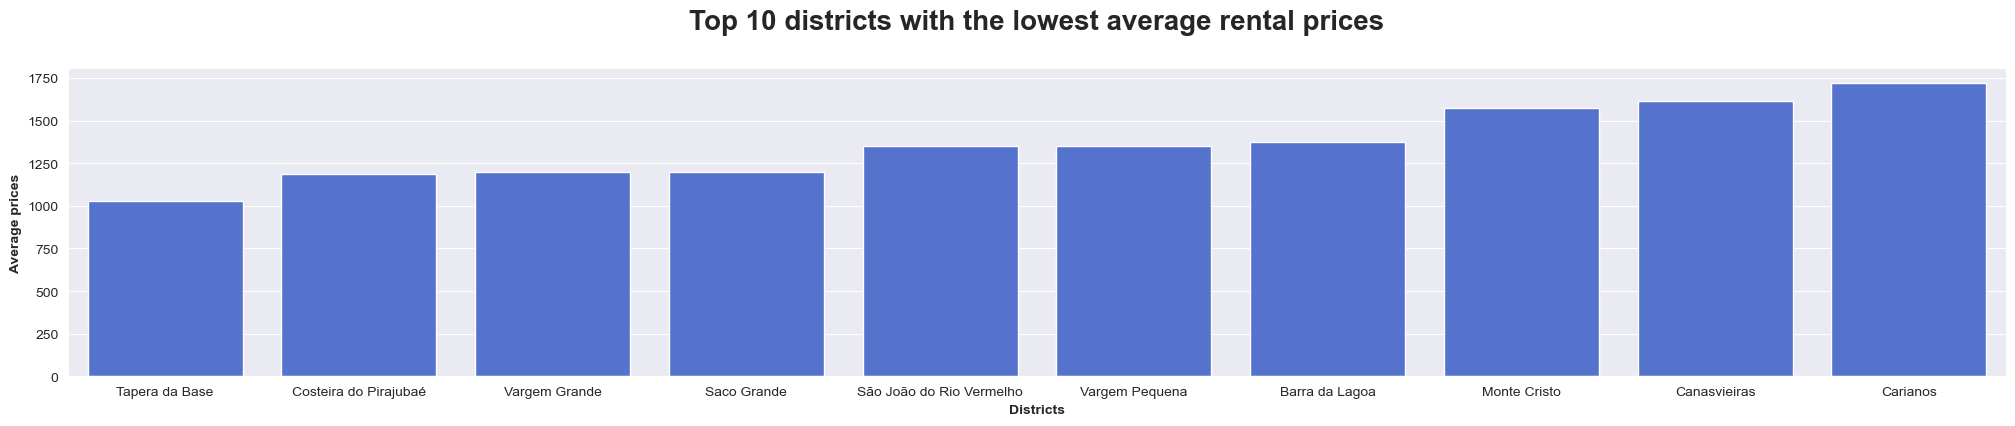

In [15]:
# Viewing the top 10 districts with the lowest average rental prices

plt.figure(figsize=(25,4))

ax = sns.barplot(x = 'district', 
                 y = 'price', 
                 data = districtsavg.sort_values(['price'], ascending = True).head(10),
                 color = 'royalblue')

ax.set_title('Top 10 districts with the lowest average rental prices', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Districts', 
              fontweight = 'bold')

ax.set_ylabel('Average prices', 
              fontweight = 'bold')

ax = ax